In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns

# 📊 Análisis Cafeterías de España



## **1. Carga y comprensión del conjunto de datos**

En este apartado se realiza una **primera toma de contacto con los datos** de ventas de cafeterías en España.

- Carga del archivo `.csv` que contiene la información del estudio.
- Visualización de las primeras filas para comprender la estructura del dataset.
- Revisión del número de registros y variables disponibles.
- Identificación del tipo de datos de cada columna.
- Descripción general de las variables más relevantes para el análisis.

*Este paso es fundamental para entender qué información tenemos y cómo podemos trabajar con ella.*

In [38]:
# 1.1 Carga del archivo `.csv` que contiene la información del estudio.
df = pd.read_csv("ventas_cafeterias_espana_bares.csv")

In [39]:

# 1.2 Visualización de las primeras filas para comprender la estructura del dataset.
display(df.head())

,ticket_id,fecha_hora,ciudad,bar,producto,categoria,precio_unitario,cantidad,metodo_pago
0,1,2025-03-03 22:25:16,Móstoles,Lounge Móstoles Sur,Croissant,reposteria,NaN,3,Bizum
1,2,2025-02-27 20:13:33,Eivissa,Cervecería Eivissa Puerto,Refresco,bebida,3.97,2,Efectivo
2,3,2025-09-14 23:53:31,Alicante,Café Alicante Este,Sandwich mixto,comida,3.31,1,Tarjeta
3,4,2025-07-12 10:06:51,Eivissa,Bar Eivissa Plaza Mayor,Latte,bebida,1.68,1,Efectivo
4,5,2025-03-02 03:42:48,Getafe,Cervecería Getafe Río,Napolitana,reposteria,1.7,2,Tarjeta


In [40]:
# 1.3 Revisión del número de registros y variables disponibles.
print(f"Dimensiones del dataset: {df.shape}")

Dimensiones del dataset: (301514, 9)


In [41]:

# 1.4 Identificación del tipo de datos de cada columna.
print("\nTipos de datos:")
print(df.dtypes)


Tipos de datos:
ticket_id           int64
fecha_hora         object
ciudad             object
bar                object
producto           object
categoria          object
precio_unitario    object
cantidad            int64
metodo_pago        object
dtype: object


In [42]:
# 1.5 Descripción general de las variables más relevantes para el análisis.
print("\nEstadísticos descriptivos:")
display(df.describe())


Estadísticos descriptivos:


,ticket_id,cantidad
count,301514.000000,301514.000000
mean,149987.679915,1.349838
std,86596.089816,0.572184
min,1.000000,1.000000
25%,74989.250000,1.000000
50%,149979.500000,1.000000
75%,224966.750000,2.000000
max,300000.000000,3.000000


## **2. Limpieza y preprocesamiento de los datos**

Antes de realizar cualquier análisis, es necesario **asegurar la calidad de los datos**.

- Detección de valores nulos o inconsistentes.
- Tratamiento de valores faltantes mediante eliminación o sustitución.
- Corrección de tipos de datos incorrectos (numéricos, fechas o categorías).
- Eliminación de posibles registros duplicados.
- Preparación del dataset para el análisis exploratorio y la visualización.

*Unos datos limpios garantizan conclusiones más fiables.*

In [43]:
# 2.1 Detección de valores nulos.
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
ticket_id             0
fecha_hora            0
ciudad                0
bar                   0
producto           3015
categoria          2938
precio_unitario    3067
cantidad              0
metodo_pago        3042
dtype: int64


In [44]:

# 2.2 Tratamiento de valores faltantes.
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].mean(), inplace=True)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [45]:
# 2.3 Corrección de tipos de datos.

# - Convertir fecha_hora a datetime
df['fecha_hora'] = pd.to_datetime(df['fecha_hora'], errors='coerce')

# - Asegurar que cantidad y precio son numéricos
df['cantidad'] = pd.to_numeric(df['cantidad'], errors='coerce')
df['precio_unitario'] = pd.to_numeric(df['precio_unitario'], errors='coerce')

In [46]:
# 2.4 Limpieza de textos y eliminación de duplicados.

# - Normalizar textos a minúsculas y quitar espacios
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()

# - Corregir erratas específicas observadas (ej. 're-post', 'comída')
df['categoria'] = df['categoria'].replace({
    'repost': 'reposteria',
    're-post': 'reposteria',
    'comída': 'comida', 
    'bebída': 'bebida'
})

# - Eliminar filas duplicadas
df = df.drop_duplicates()

In [47]:
# 2.5 Resetear el índice tras la limpieza
df = df.reset_index(drop=True)
print("\nDatos limpios. Dimensiones actuales:", df.shape)


Datos limpios. Dimensiones actuales: (301258, 9)


## **3. Análisis univariante de las ventas**

En este ejercicio se analiza una variable de forma individual para entender su comportamiento.

- Distribución de la cantidad vendida.
- Distribución del precio unitario
- Comparación visual de ambas variables

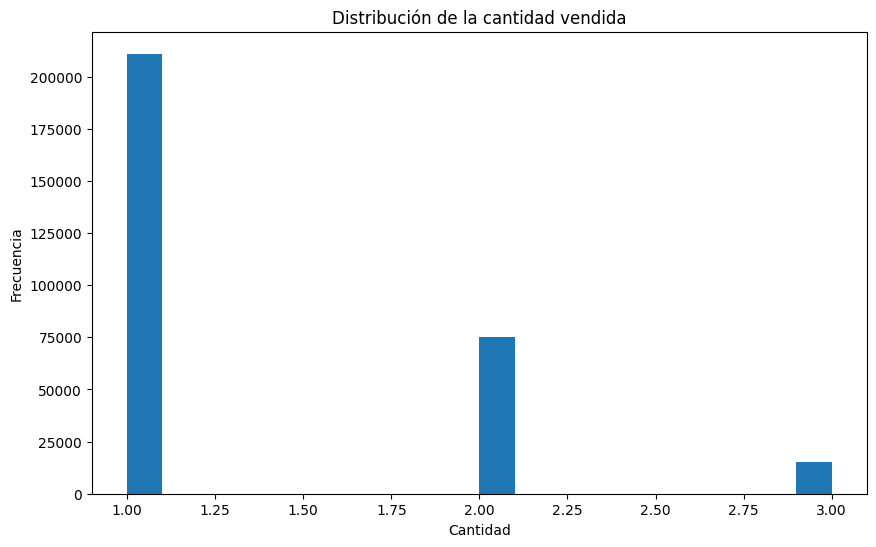

In [48]:
# 3.1 Histograma de la cantidad vendida.
plt.figure(figsize=(10, 6))
plt.hist(df["cantidad"], bins=20)
plt.title("Distribución de la cantidad vendida")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.show()

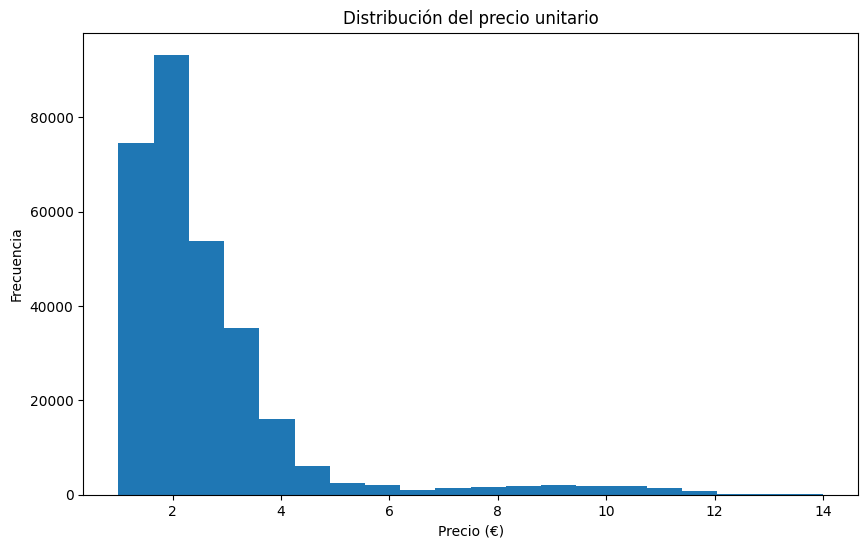

In [49]:
# 3.2 Histograma del precio unitario
plt.figure(figsize=(10, 6))
plt.hist(df["precio_unitario"], bins=20)
plt.title("Distribución del precio unitario")
plt.xlabel("Precio (€)")
plt.ylabel("Frecuencia")
plt.show()

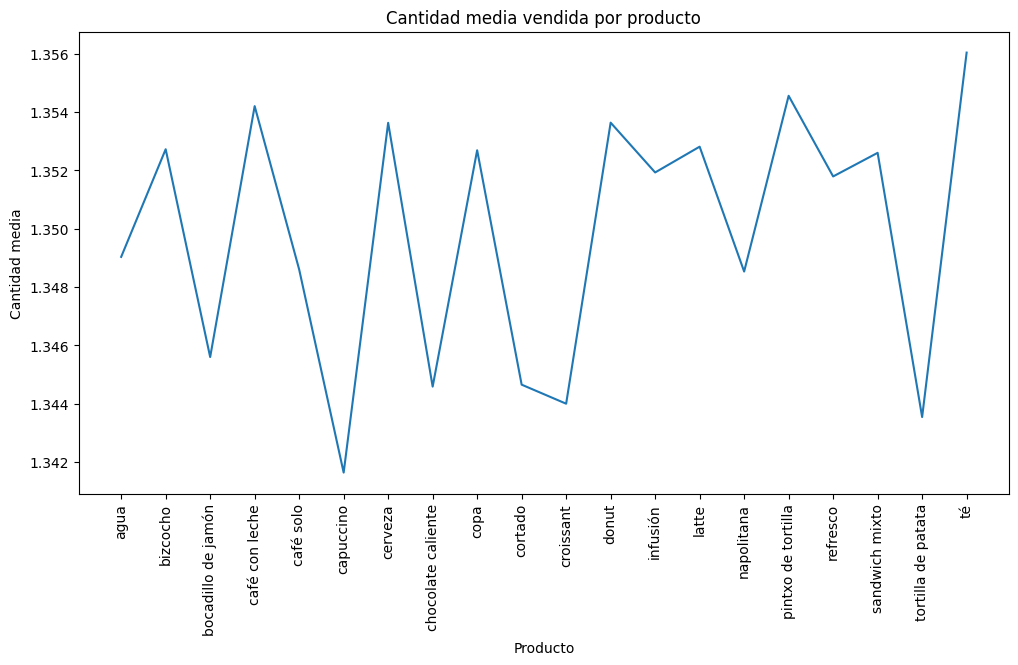

In [50]:
# 3.3 Gráfico de líneas: cantidad media vendida
cantidad_media = df.groupby("producto")["cantidad"].mean()

plt.figure(figsize=(12, 6))
plt.plot(cantidad_media.index, cantidad_media.values)
plt.title("Cantidad media vendida por producto")
plt.xlabel("Producto")
plt.ylabel("Cantidad media")
plt.xticks(rotation=90)
plt.show()


## **4. Comparación de distribuciones mediante multihistogramas**

En este apartado se comparan las ventas según una característica concreta del dataset.

- Análisis de cómo varía la distribución de las ventas entre distintos grupos.
- Comparación visual entre categorías relevantes.
- Identificación de diferencias significativas entre los grupos analizados.

**Gráficos utilizados:**
- Multihistogramas (Matplotlib)

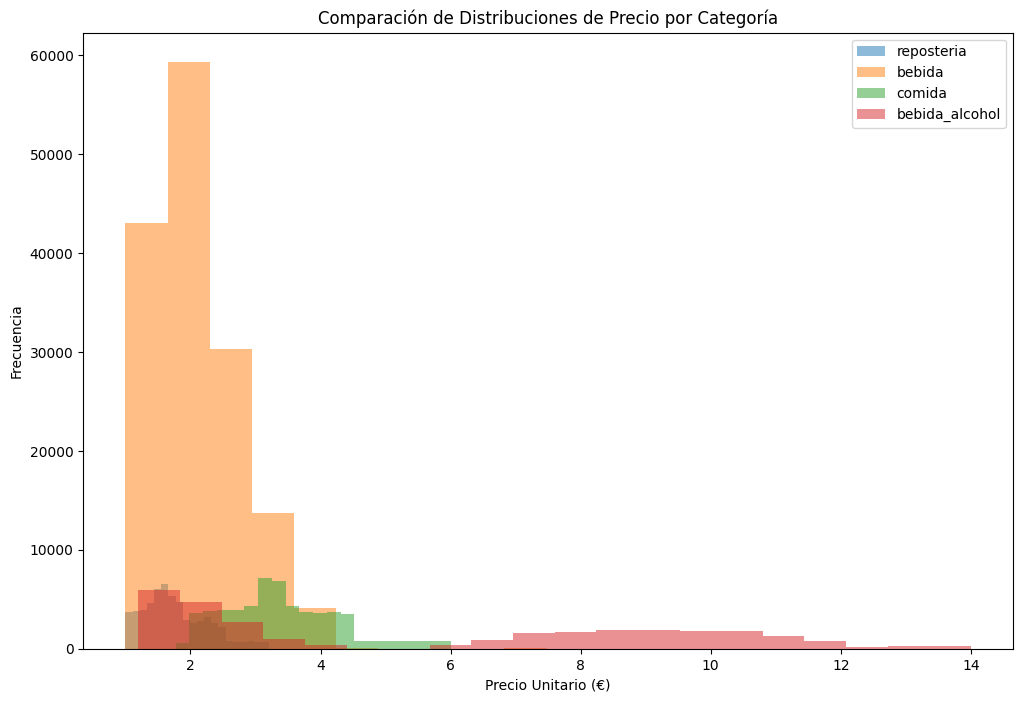

In [51]:
# Comparación de distribuciones entre categorías de productos.
categorias = df['categoria'].unique()

plt.figure(figsize=(12, 8))
for categoria in categorias:
    subset = df[df['categoria'] == categoria]
    # Usamos 'precio_unitario' o 'cantidad' según lo que queramos comparar. 
    # Aquí comparamos precios para ver diferencias de distribución.
    plt.hist(subset['precio_unitario'], bins=20, alpha=0.5, label=categoria)

plt.title('Comparación de Distribuciones de Precio por Categoría')
plt.xlabel('Precio Unitario (€)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

## **5. Evolución temporal de las ventas**

Se estudia cómo evolucionan las ventas a lo largo del tiempo.

- Análisis de la tendencia general de las ventas.
- Detección de picos, caídas o comportamientos repetitivos.
- Observación de posibles patrones estacionales.

**Gráficos utilizados:**
- Gráfico de líneas  

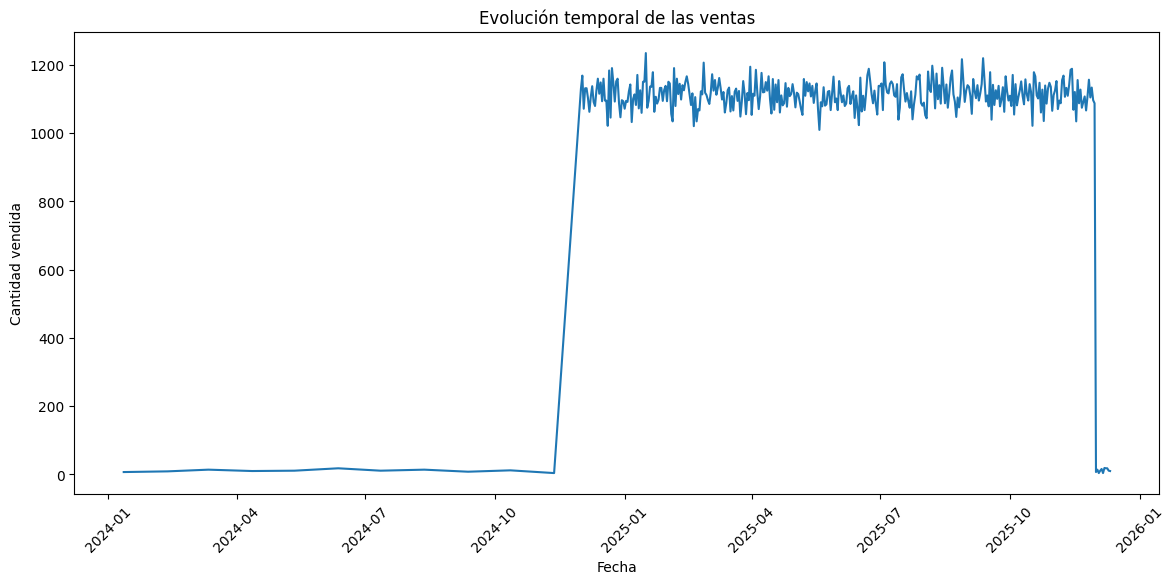

In [52]:
ventas_diarias = df.groupby(df["fecha_hora"].dt.date)["cantidad"].sum()

plt.figure(figsize=(14, 6))
plt.plot(ventas_diarias.index, ventas_diarias.values)
plt.title("Evolución temporal de las ventas")
plt.xlabel("Fecha")
plt.ylabel("Cantidad vendida")
plt.xticks(rotation=45)
plt.show()


## **6. Relación entre variables numéricas**

Se analiza la relación entre las ventas y otras variables numéricas del dataset.

- Estudio de posibles relaciones o dependencias entre variables.
- Identificación de patrones de comportamiento conjunto.
- Comparación de distintas relaciones dentro de una misma visualización.

**Gráficos utilizados:**
- Scatter (gráfico de dispersión)  
- Scatter múltiple  

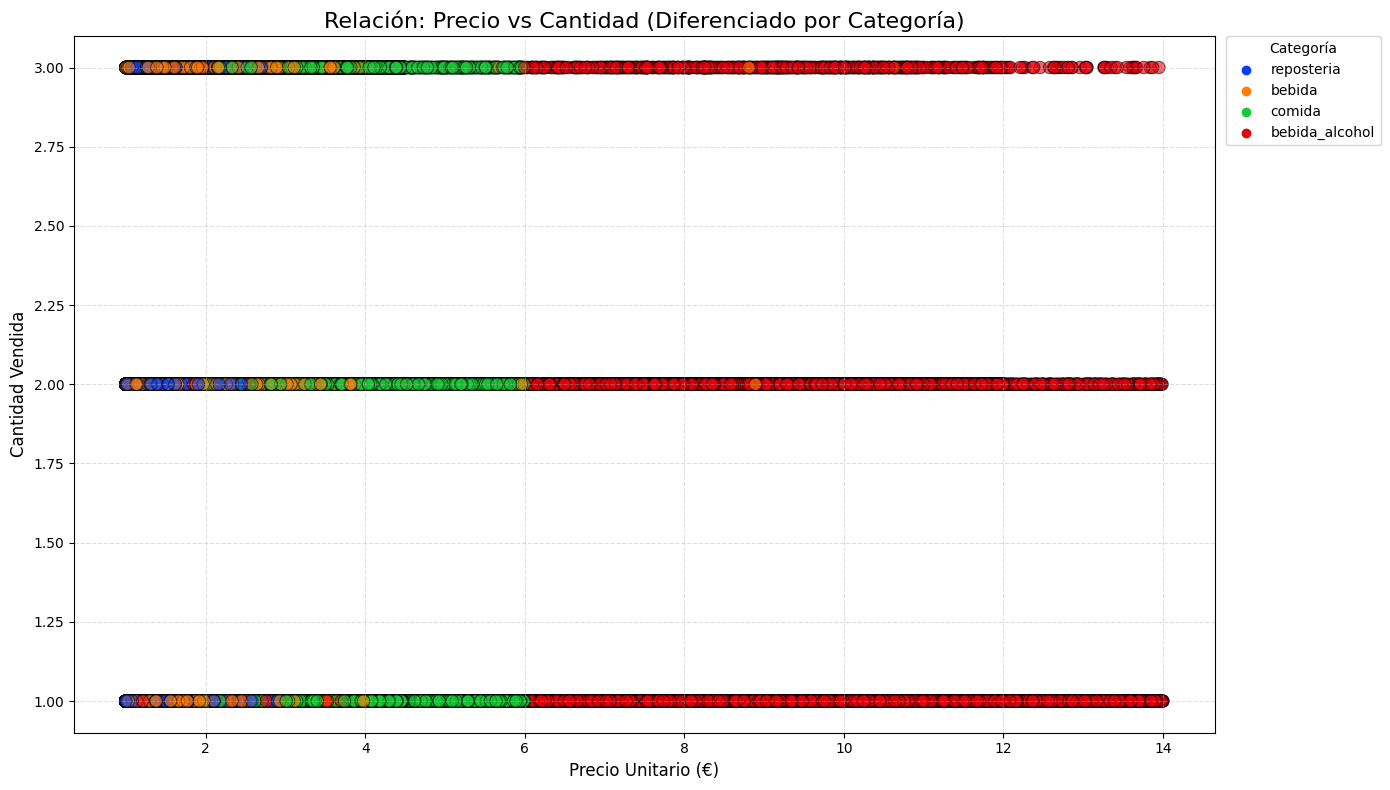

In [53]:
# Configuración del tamaño del gráfico para que se vea amplio
plt.figure(figsize=(14, 8))

# Creamos el gráfico de dispersión con Seaborn
# x: Precio, y: Cantidad
# hue: Colorea los puntos según la 'categoria' (esto es lo que diferencia todo bien)
# size: Opcional, podemos hacer los puntos un poco más grandes para verlos mejor
# alpha: Transparencia para ver dónde se acumulan muchos puntos
sns.scatterplot(
    data=df,
    x='precio_unitario',
    y='cantidad',
    hue='categoria',
    palette='bright', # Paleta de colores vivos para diferenciar bien
    alpha=0.6,
    s=80,             # Tamaño de los puntos
    edgecolor='black' # Borde negro fino para distinguir puntos solapados
)

# Títulos y etiquetas claras
plt.title('Relación: Precio vs Cantidad (Diferenciado por Categoría)', fontsize=16)
plt.xlabel('Precio Unitario (€)', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)

# Rejilla suave para ayudar a leer los valores
plt.grid(True, linestyle='--', alpha=0.4)

# Colocar la leyenda fuera del gráfico para que no estorbe
plt.legend(title='Categoría', bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

## **7. Análisis de correlación entre variables**

En este apartado se evalúa el grado de relación entre las variables numéricas.

- Cálculo de la correlación entre variables.
- Identificación de relaciones positivas, negativas o inexistentes.
- Interpretación de las correlaciones más relevantes para el análisis.

**Gráficos utilizados:**
- Matriz de correlación 

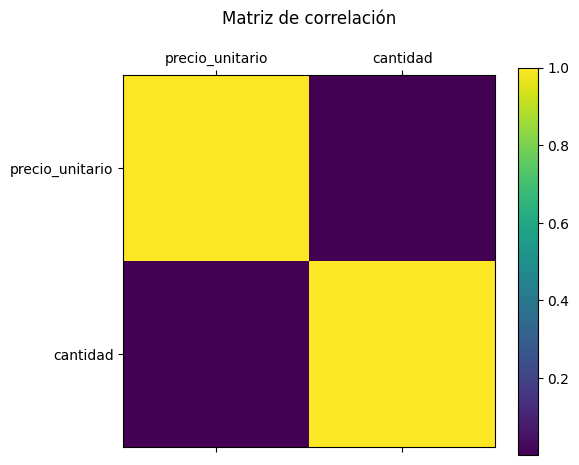

In [54]:
correlacion = df[["precio_unitario", "cantidad"]].corr()

plt.figure(figsize=(6, 5))
plt.matshow(correlacion, fignum=1)
plt.colorbar()
plt.xticks(range(len(correlacion.columns)), correlacion.columns)
plt.yticks(range(len(correlacion.columns)), correlacion.columns)
plt.title("Matriz de correlación", pad=20)
plt.show()


## **8. Comparación visual mediante subplots**

Se utilizan subplots para facilitar la comparación de diferentes análisis en una misma figura.

- Representación simultánea de varias distribuciones.
- Comparación de patrones entre distintas variables o grupos.
- Mejora de la interpretación visual de los resultados.

**Gráficos utilizados:**
- Subplots  
- Histogramas  
- Boxplots  
- Scatter 

C:\Users\ibaig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:62: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\ibaig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


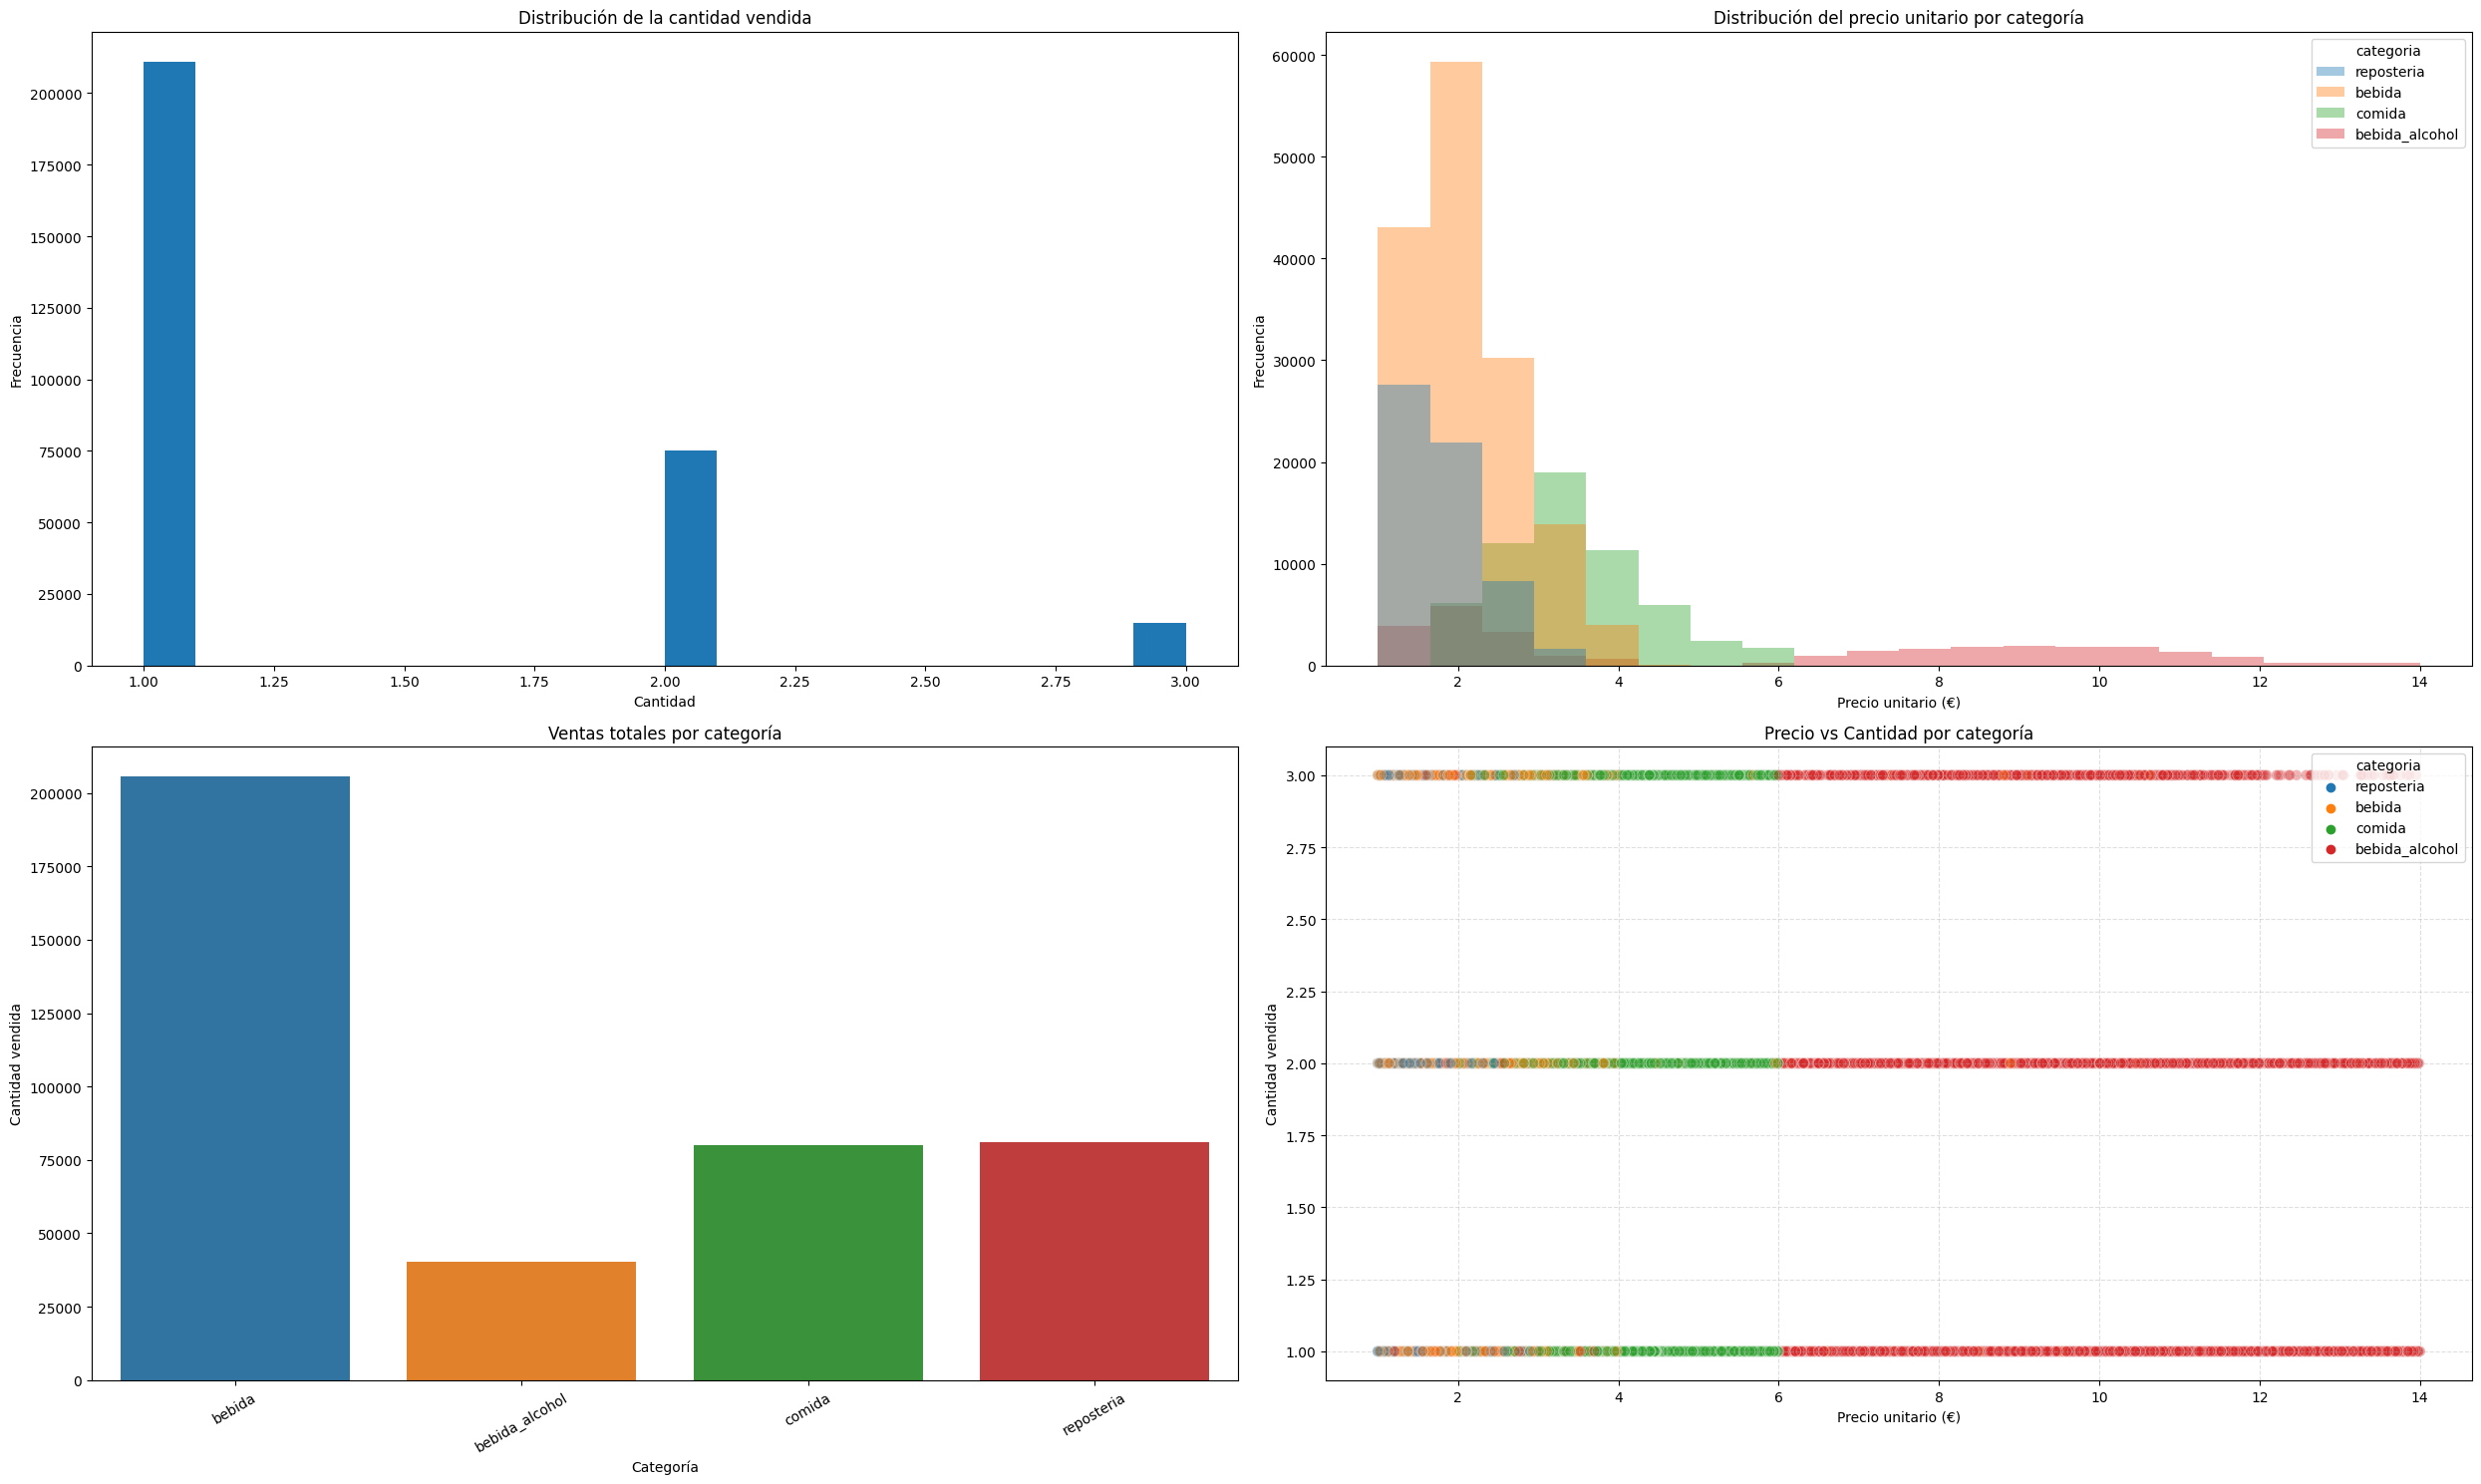

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

ventas_categoria = (
    df.groupby("categoria")["cantidad"]
    .sum()
    .reset_index()
)

plt.figure(figsize=(25, 15))

# 1️⃣ Histograma de cantidad (Matplotlib)
plt.subplot(2, 2, 1)
plt.hist(df["cantidad"], bins=20)
plt.title("Distribución de la cantidad vendida")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")

# 2️⃣ Histograma de precios por categoría (Seaborn)
plt.subplot(2, 2, 2)
sns.histplot(
    data=df,
    x="precio_unitario",
    hue="categoria",
    bins=20,
    multiple="layer",
    alpha=0.4,
    edgecolor='none'
)
plt.title("Distribución del precio unitario por categoría")
plt.xlabel("Precio unitario (€)")
plt.ylabel("Frecuencia")

# 3️⃣ Barras por categoría (Seaborn)
plt.subplot(2, 2, 3)
sns.barplot(
    data=ventas_categoria,
    x="categoria",
    y="cantidad"
)
plt.title("Ventas totales por categoría")
plt.xlabel("Categoría")
plt.ylabel("Cantidad vendida")
plt.xticks(rotation=30)

# 4️⃣ Scatter por categoría (Seaborn)
plt.subplot(2, 2, 4)
sns.scatterplot(
    data=df,
    x="precio_unitario",
    y="cantidad",
    hue="categoria",
    alpha=0.35,
    s=60
)
plt.title("Precio vs Cantidad por categoría")
plt.xlabel("Precio unitario (€)")
plt.ylabel("Cantidad vendida")
plt.grid(True, linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()


## **9. Detección de valores atípicos**

Se identifican posibles valores extremos que pueden influir en el análisis.

- Localización de outliers en las variables más relevantes.
- Evaluación del impacto de estos valores en las conclusiones.
- Reflexión sobre si deben mantenerse o tratarse de forma específica.

In [78]:
# Variables relevantes
variables = ['precio_unitario', 'cantidad']

# Diccionario para guardar outliers
outliers_dict = {}

for var in variables:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    
    # Filtramos los outliers
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    outliers_dict[var] = outliers
    
    print(f"\nOutliers detectados en {var}: {len(outliers)}")



Outliers detectados en precio_unitario: 18791

Outliers detectados en cantidad: 0


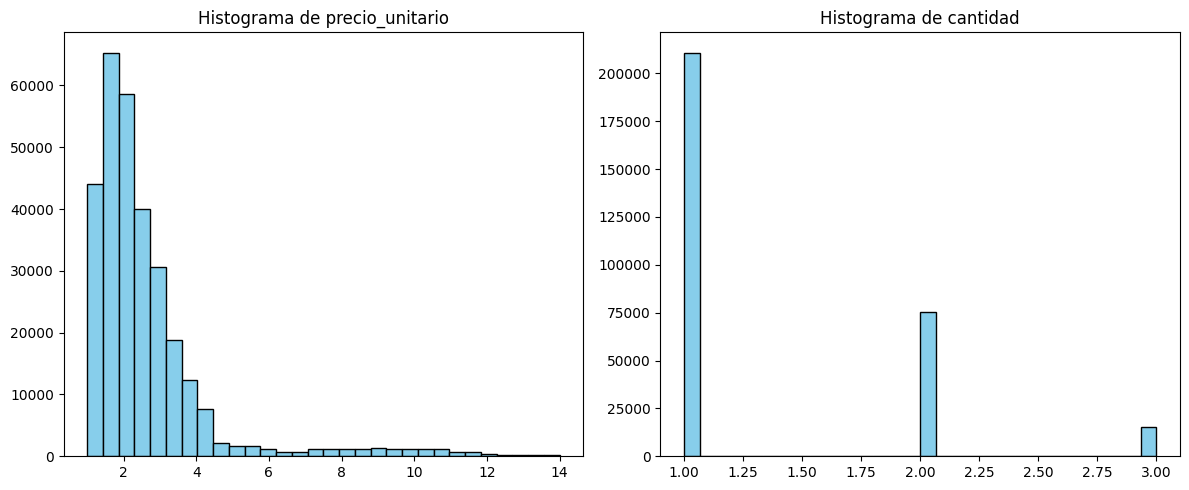

C:\Users\ibaig\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


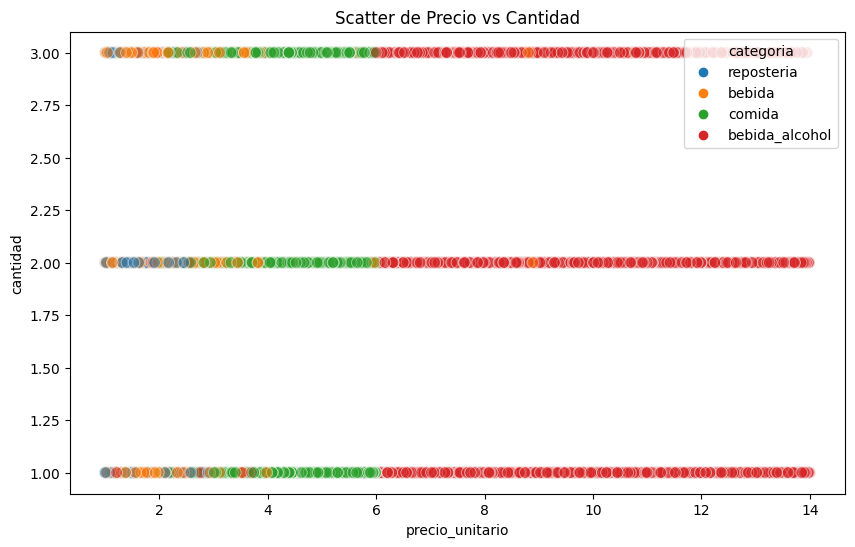

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas
plt.figure(figsize=(12,5))
for i, var in enumerate(variables):
    plt.subplot(1, 2, i+1)
    plt.hist(df[var], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {var}')
plt.tight_layout()
plt.show()

# Scatter de precio vs cantidad con outliers destacados
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='precio_unitario', y='cantidad', hue='categoria', alpha=0.5, s=70)
plt.title('Scatter de Precio vs Cantidad')
plt.show()


In [80]:
for var in variables:
    print(f"\nEstadísticas originales de {var}:")
    print(df[var].describe())
    
    # Eliminamos outliers temporalmente
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    df_no_outliers = df[(df[var] >= Q1 - 1.5*IQR) & (df[var] <= Q3 + 1.5*IQR)]
    
    print(f"\nEstadísticas de {var} sin outliers:")
    print(df_no_outliers[var].describe())



Estadísticas originales de precio_unitario:
count    298231.000000
mean          2.635138
std           1.786824
min           1.000000
25%           1.650000
50%           2.160000
75%           2.970000
max          14.000000
Name: precio_unitario, dtype: float64

Estadísticas de precio_unitario sin outliers:
count    279440.000000
mean          2.244776
std           0.821218
min           1.000000
25%           1.610000
50%           2.090000
75%           2.760000
max           4.950000
Name: precio_unitario, dtype: float64

Estadísticas originales de cantidad:
count    301258.000000
mean          1.349846
std           0.572214
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           3.000000
Name: cantidad, dtype: float64

Estadísticas de cantidad sin outliers:
count    301258.000000
mean          1.349846
std           0.572214
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max       

In [72]:
# Saber cuantas ventas tienen el top 10 ciudades.
ventas_ciudad = (
    df.groupby("ciudad")["cantidad"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

print(ventas_ciudad)

        ciudad  cantidad
0      logroño      6748
1  ciudad real      6726
2      sevilla      6671
3       cuenca      6664
4  fuenlabrada      6622
5     móstoles      6619
6   valladolid      6617
7       teruel      6607
8      almería      6594
9     palencia      6592


## **10. Conclusiones e insights finales**

En este último apartado se resumen los principales resultados obtenidos.

- **Síntesis de los patrones y tendencias detectadas.**

La mayoría de productos se concentran en precios y cantidades medias; los outliers representan ventas excepcionales o precios atípicos.

- **Interpretación de los resultados obtenidos a partir de los gráficos.**

El scatter y los histogramas muestran agrupaciones centrales con algunos valores extremos que pueden influir en la media.

- **Extracción de insights útiles para la toma de decisiones.**

Insights: enfocar estrategias en productos representativos, analizar outliers como oportunidades o riesgos, y usar métricas robustas para decisiones más precisas.

- **Propuestas de mejora o recomendaciones estratégicas basadas en el análisis.**

Recomendaciones: seguimiento de outliers, ajustar precios o promociones según tendencias, priorizar productos de alta rotación y considerar transformaciones para análisis futuros.